# Dropout Regularization

It's a little non-intuitive, but sometimes throwing data away during training produces better results!

That's because we're not throwing it away entirely, but hiding a random portion of the data at each training step. That helps to prevent overfitting, and forces the neural network to spread out its learning over more of its neurons.

Let's see it in action. We'll use scikit_learn's make_classification function to randomly create a clustering problem with 4 classes, and 1000 samples:

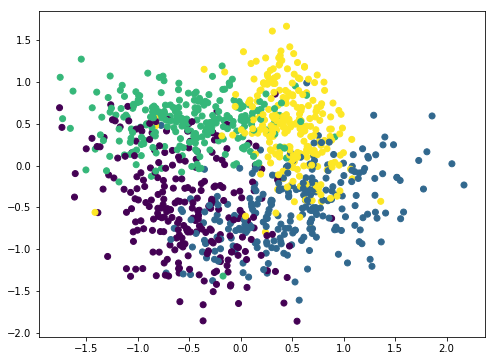

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_classes=4, n_samples=1000, n_redundant=0, n_informative=2,
                           random_state=47, n_clusters_per_class=1, scale=0.5)

from pylab import *

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

As we did before, we'll use the to_categorical function to "one-hot encode" our label data, and then produce a random train/test split of the resulting dataset:

In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

y = keras.utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, let's set up a deep neural network without any dropout layers, and see how it does:

In [3]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=100,
                    verbose=2,
                    validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
None
Train on 800 samples, validate on 200 samples
Epoch 1/100
 - 0s - loss: 1.3536 - acc: 0.4000 - val_loss: 1.3360 - val_acc: 0.4550
Epoch 2/100
 - 0s - loss: 1.3363 - acc: 0.4600 - val_loss: 1.3190 - val_acc: 0.5050
Epoch 3/100
 - 0s - loss: 1.3193 - acc: 0.4912 - val_loss: 1.3021 - val_acc: 0.5150
Epoch 4/100
 - 0s - loss: 1.3024 - acc: 0.5100 - val_loss: 1.2846 - val_acc: 0.5350
Epoch 5/100
 - 0s - l

Epoch 89/100
 - 0s - loss: 0.5838 - acc: 0.7637 - val_loss: 0.6414 - val_acc: 0.7500
Epoch 90/100
 - 0s - loss: 0.5839 - acc: 0.7637 - val_loss: 0.6395 - val_acc: 0.7600
Epoch 91/100
 - 0s - loss: 0.5833 - acc: 0.7612 - val_loss: 0.6397 - val_acc: 0.7500
Epoch 92/100
 - 0s - loss: 0.5829 - acc: 0.7663 - val_loss: 0.6403 - val_acc: 0.7500
Epoch 93/100
 - 0s - loss: 0.5829 - acc: 0.7650 - val_loss: 0.6401 - val_acc: 0.7550
Epoch 94/100
 - 0s - loss: 0.5828 - acc: 0.7650 - val_loss: 0.6409 - val_acc: 0.7500
Epoch 95/100
 - 0s - loss: 0.5820 - acc: 0.7662 - val_loss: 0.6393 - val_acc: 0.7550
Epoch 96/100
 - 0s - loss: 0.5821 - acc: 0.7625 - val_loss: 0.6380 - val_acc: 0.7550
Epoch 97/100
 - 0s - loss: 0.5820 - acc: 0.7650 - val_loss: 0.6389 - val_acc: 0.7550
Epoch 98/100
 - 0s - loss: 0.5819 - acc: 0.7675 - val_loss: 0.6390 - val_acc: 0.7500
Epoch 99/100
 - 0s - loss: 0.5814 - acc: 0.7662 - val_loss: 0.6375 - val_acc: 0.7600
Epoch 100/100
 - 0s - loss: 0.5810 - acc: 0.7650 - val_loss: 0.63

Note the final accuracy we ended up with at the end there. We ran this for 100 epochs, because we wanted to give our model ample time to start overfitting to the data.

Now, let's set up the same deep neural network, but with a 20% droput layer in between each hidden layer:

In [6]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=X_train.shape[1:]))
model.add(Dropout(0.4))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
          
print(model.summary())

history = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=500,
                    verbose=2,
                    validation_data=(X_test, y_test))

scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                48        
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_5 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 36        
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
None
Train on 800 samples, validate on 200 samples
Epoch 1/500
 - 0s - loss: 1.4059 - acc: 0.2362 - val_loss: 1.3869 - val_acc: 0.2800
Epoch 2/5

Epoch 86/500
 - 0s - loss: 0.8559 - acc: 0.6575 - val_loss: 0.7154 - val_acc: 0.7400
Epoch 87/500
 - 0s - loss: 0.8859 - acc: 0.6362 - val_loss: 0.7143 - val_acc: 0.7400
Epoch 88/500
 - 0s - loss: 0.8867 - acc: 0.6300 - val_loss: 0.7129 - val_acc: 0.7400
Epoch 89/500
 - 0s - loss: 0.8816 - acc: 0.6388 - val_loss: 0.7120 - val_acc: 0.7450
Epoch 90/500
 - 0s - loss: 0.8526 - acc: 0.6375 - val_loss: 0.7113 - val_acc: 0.7400
Epoch 91/500
 - 0s - loss: 0.8698 - acc: 0.6338 - val_loss: 0.7107 - val_acc: 0.7350
Epoch 92/500
 - 0s - loss: 0.8845 - acc: 0.6513 - val_loss: 0.7104 - val_acc: 0.7350
Epoch 93/500
 - 0s - loss: 0.8993 - acc: 0.6163 - val_loss: 0.7094 - val_acc: 0.7400
Epoch 94/500
 - 0s - loss: 0.8628 - acc: 0.6425 - val_loss: 0.7082 - val_acc: 0.7400
Epoch 95/500
 - 0s - loss: 0.8513 - acc: 0.6663 - val_loss: 0.7064 - val_acc: 0.7400
Epoch 96/500
 - 0s - loss: 0.8790 - acc: 0.6362 - val_loss: 0.7051 - val_acc: 0.7400
Epoch 97/500
 - 0s - loss: 0.8890 - acc: 0.6250 - val_loss: 0.703

Epoch 182/500
 - 0s - loss: 0.8177 - acc: 0.6475 - val_loss: 0.6717 - val_acc: 0.7350
Epoch 183/500
 - 0s - loss: 0.8260 - acc: 0.6588 - val_loss: 0.6710 - val_acc: 0.7350
Epoch 184/500
 - 0s - loss: 0.8281 - acc: 0.6525 - val_loss: 0.6704 - val_acc: 0.7350
Epoch 185/500
 - 0s - loss: 0.8371 - acc: 0.6437 - val_loss: 0.6697 - val_acc: 0.7350
Epoch 186/500
 - 0s - loss: 0.8214 - acc: 0.6825 - val_loss: 0.6698 - val_acc: 0.7400
Epoch 187/500
 - 0s - loss: 0.8202 - acc: 0.6375 - val_loss: 0.6699 - val_acc: 0.7400
Epoch 188/500
 - 0s - loss: 0.8276 - acc: 0.6463 - val_loss: 0.6701 - val_acc: 0.7450
Epoch 189/500
 - 0s - loss: 0.8144 - acc: 0.6388 - val_loss: 0.6697 - val_acc: 0.7500
Epoch 190/500
 - 0s - loss: 0.8468 - acc: 0.6500 - val_loss: 0.6690 - val_acc: 0.7450
Epoch 191/500
 - 0s - loss: 0.8270 - acc: 0.6450 - val_loss: 0.6682 - val_acc: 0.7450
Epoch 192/500
 - 0s - loss: 0.8215 - acc: 0.6588 - val_loss: 0.6674 - val_acc: 0.7450
Epoch 193/500
 - 0s - loss: 0.8417 - acc: 0.6525 - val

Epoch 278/500
 - 0s - loss: 0.8067 - acc: 0.6538 - val_loss: 0.6612 - val_acc: 0.7500
Epoch 279/500
 - 0s - loss: 0.8037 - acc: 0.6488 - val_loss: 0.6616 - val_acc: 0.7450
Epoch 280/500
 - 0s - loss: 0.8071 - acc: 0.6700 - val_loss: 0.6621 - val_acc: 0.7450
Epoch 281/500
 - 0s - loss: 0.8300 - acc: 0.6500 - val_loss: 0.6619 - val_acc: 0.7450
Epoch 282/500
 - 0s - loss: 0.8018 - acc: 0.6550 - val_loss: 0.6620 - val_acc: 0.7450
Epoch 283/500
 - 0s - loss: 0.7669 - acc: 0.6725 - val_loss: 0.6610 - val_acc: 0.7500
Epoch 284/500
 - 0s - loss: 0.8083 - acc: 0.6538 - val_loss: 0.6599 - val_acc: 0.7600
Epoch 285/500
 - 0s - loss: 0.7997 - acc: 0.6775 - val_loss: 0.6598 - val_acc: 0.7600
Epoch 286/500
 - 0s - loss: 0.7621 - acc: 0.6875 - val_loss: 0.6593 - val_acc: 0.7500
Epoch 287/500
 - 0s - loss: 0.7890 - acc: 0.6550 - val_loss: 0.6588 - val_acc: 0.7450
Epoch 288/500
 - 0s - loss: 0.8081 - acc: 0.6825 - val_loss: 0.6588 - val_acc: 0.7450
Epoch 289/500
 - 0s - loss: 0.8121 - acc: 0.6638 - val

Epoch 374/500
 - 0s - loss: 0.8157 - acc: 0.6637 - val_loss: 0.6593 - val_acc: 0.7550
Epoch 375/500
 - 0s - loss: 0.8028 - acc: 0.6725 - val_loss: 0.6599 - val_acc: 0.7550
Epoch 376/500
 - 0s - loss: 0.7846 - acc: 0.6537 - val_loss: 0.6592 - val_acc: 0.7550
Epoch 377/500
 - 0s - loss: 0.8232 - acc: 0.6400 - val_loss: 0.6585 - val_acc: 0.7600
Epoch 378/500
 - 0s - loss: 0.8275 - acc: 0.6300 - val_loss: 0.6583 - val_acc: 0.7500
Epoch 379/500
 - 0s - loss: 0.8006 - acc: 0.6938 - val_loss: 0.6581 - val_acc: 0.7350
Epoch 380/500
 - 0s - loss: 0.8092 - acc: 0.6737 - val_loss: 0.6573 - val_acc: 0.7400
Epoch 381/500
 - 0s - loss: 0.8086 - acc: 0.6700 - val_loss: 0.6566 - val_acc: 0.7500
Epoch 382/500
 - 0s - loss: 0.8082 - acc: 0.6450 - val_loss: 0.6573 - val_acc: 0.7500
Epoch 383/500
 - 0s - loss: 0.7901 - acc: 0.6700 - val_loss: 0.6580 - val_acc: 0.7500
Epoch 384/500
 - 0s - loss: 0.7933 - acc: 0.6675 - val_loss: 0.6580 - val_acc: 0.7450
Epoch 385/500
 - 0s - loss: 0.8085 - acc: 0.6662 - val

Epoch 470/500
 - 0s - loss: 0.8092 - acc: 0.6587 - val_loss: 0.6615 - val_acc: 0.7600
Epoch 471/500
 - 0s - loss: 0.8160 - acc: 0.6487 - val_loss: 0.6614 - val_acc: 0.7600
Epoch 472/500
 - 0s - loss: 0.7727 - acc: 0.6637 - val_loss: 0.6604 - val_acc: 0.7650
Epoch 473/500
 - 0s - loss: 0.7816 - acc: 0.6575 - val_loss: 0.6594 - val_acc: 0.7650
Epoch 474/500
 - 0s - loss: 0.7658 - acc: 0.6788 - val_loss: 0.6586 - val_acc: 0.7500
Epoch 475/500
 - 0s - loss: 0.7557 - acc: 0.6738 - val_loss: 0.6577 - val_acc: 0.7500
Epoch 476/500
 - 0s - loss: 0.8011 - acc: 0.6512 - val_loss: 0.6581 - val_acc: 0.7500
Epoch 477/500
 - 0s - loss: 0.7795 - acc: 0.6625 - val_loss: 0.6588 - val_acc: 0.7550
Epoch 478/500
 - 0s - loss: 0.7821 - acc: 0.6688 - val_loss: 0.6588 - val_acc: 0.7500
Epoch 479/500
 - 0s - loss: 0.7834 - acc: 0.6762 - val_loss: 0.6590 - val_acc: 0.7550
Epoch 480/500
 - 0s - loss: 0.7845 - acc: 0.6587 - val_loss: 0.6585 - val_acc: 0.7550
Epoch 481/500
 - 0s - loss: 0.8152 - acc: 0.6400 - val

It performed a little bit better! Perhaps we were in fact overfitting to the training data before, and the dropout layers helped to prevent that.